In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<h1 style="font-size:3.5rem;color:blue;">Dataset Overview</h1>

In [3]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])

In [4]:
df.head()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test
0,2021-08-10,22:48:53,14.81,14.69,66.7,18.8,84.50,16.93,0.0,1,0
1,2021-08-10,23:33:53,14.88,14.69,78.3,18.0,84.45,15.83,0.0,1,0
2,2021-08-11,00:03:55,14.88,14.69,83.2,17.4,84.35,15.22,0.0,1,0
3,2021-08-11,00:33:55,14.88,14.69,84.8,16.7,84.15,14.58,0.0,1,0
4,2021-08-11,00:48:54,14.88,14.69,87.4,16.0,84.10,14.18,0.0,1,0


In [5]:
#dataset features
list(df.columns)

['date',
 'hour',
 'fluid_temp',
 'ground_temp',
 'air_umidity',
 'air_temp',
 'gas_umidity',
 'gas_temp',
 'dm3_gas',
 'bio_id',
 'phase_test']

In [17]:
bio1 = df[df['bio_id']==1]
bio2 = df[df['bio_id']==2]
print(f"Bio 1 : {bio1.shape[0]}")
print(f"Bio 2 : {bio2.shape[0]}")

Bio 1 : 24556
Bio 2 : 19447


In [23]:
phase_test0 = df[df['phase_test']==0]
phase_test1 = df[df['phase_test']==1]
phase_test2 = df[df['phase_test']==2]
phase_test3 = df[df['phase_test']==3]
print(f"PHASE TEST 0 : {phase_test0.shape[0]} Entries")
print(f"PHASE TEST 1 : {phase_test1.shape[0]} Entries")
print(f"PHASE TEST 2 : {phase_test2.shape[0]} Entries")
print(f"PHASE TEST 3 : {phase_test3.shape[0]} Entries")

PHASE TEST 0 : 5109 Entries
PHASE TEST 1 : 21750 Entries
PHASE TEST 2 : 9838 Entries
PHASE TEST 3 : 7306 Entries


In [24]:
df['dm3_gas'].value_counts()

0.00    41268
0.01     2735
Name: dm3_gas, dtype: int64

<Axes: xlabel='dm3_gas', ylabel='count'>

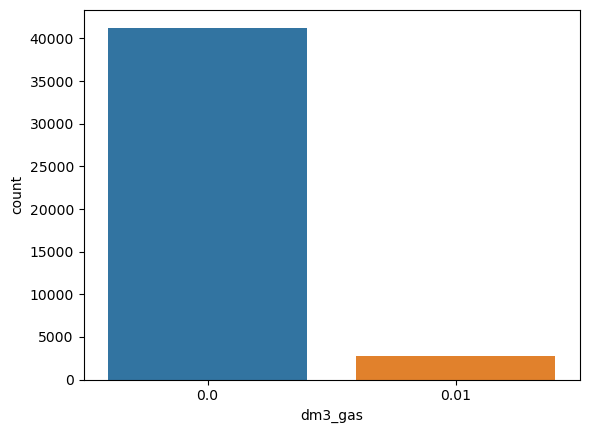

In [28]:
sns.countplot(x = df['dm3_gas'])

<Axes: xlabel='phase_test', ylabel='count'>

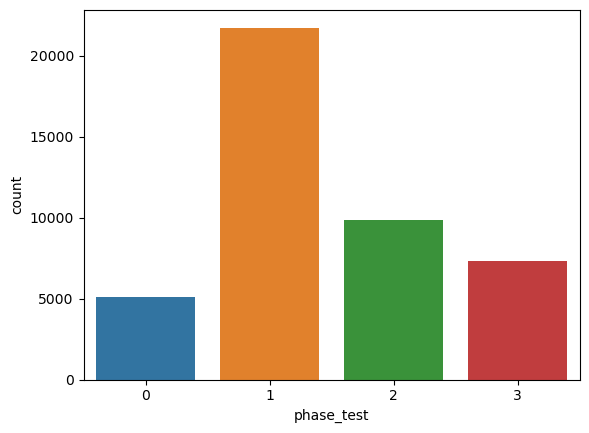

In [29]:
sns.countplot(x=df['phase_test'])

<Axes: xlabel='bio_id', ylabel='count'>

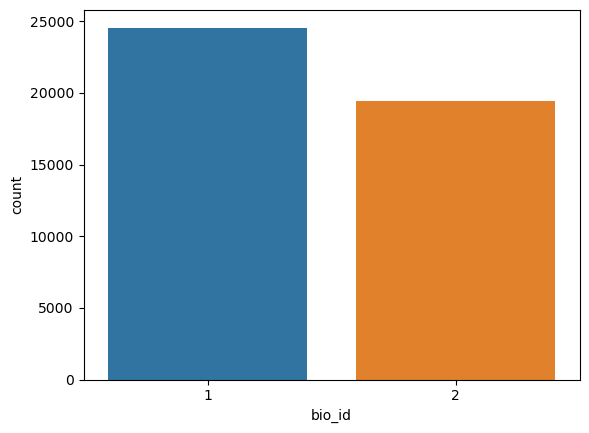

In [30]:
sns.countplot(x=df['bio_id'])

In [37]:
df.sample()

,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test
14088,2022-01-02,21:19:21,21.88,22.38,89.1,22.1,NaN,NaN,0.0,1,1


<h1 style="font-size:3.5rem;color:blue;">Features overview</h1>

In [38]:
# Calculate the mean of dm3_gas for each column
mean_dm3_gas = df.groupby('bio_id')['dm3_gas'].mean()

# Identify the column with the highest mean dm3_gas
most_effective_column = mean_dm3_gas.idxmax()
highest_mean_dm3_gas = mean_dm3_gas.max()

print("The most effective column for biogas production is '{}' with a mean dm3_gas of {:.2f}.".format(most_effective_column, highest_mean_dm3_gas))


The most effective column for biogas production is '2' with a mean dm3_gas of 0.00.


In [39]:
mean_dm3_gas

bio_id
1    0.000343
2    0.000973
Name: dm3_gas, dtype: float64

In [40]:
most_effective_column

2

In [41]:
highest_mean_dm3_gas

0.0009734149226101712

## Peak points

In [62]:
# Find peak points for each feature
prod0= df[df['dm3_gas']==0]
prod1 = df[df['dm3_gas']==0.01]

#max
peak_points0 = prod0.max()
peak_points1 = prod1.max()

#min
low_points0 = prod0.min()
low_points1 = prod1.min()

#prod0
print("Peak Points of Dependent Features in prod0:")
print(peak_points0[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'dm3_gas']])
#prod1
print("Peak Points of Dependent Features in prod1:")
print(peak_points1[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'dm3_gas']])

#prod0
print("low Points of Dependent Features in prod0:")
print(low_points0[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'dm3_gas']])
#prod1
print("low Points of Dependent Features in prod1:")
print(low_points1[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'dm3_gas']])

Peak Points of Dependent Features in prod0:
fluid_temp      24.38
ground_temp     24.94
air_umidity      99.9
air_temp         52.6
gas_umidity    113.06
gas_temp       120.79
dm3_gas           0.0
dtype: object
Peak Points of Dependent Features in prod1:
fluid_temp      24.38
ground_temp     24.94
air_umidity      99.9
air_temp         39.6
gas_umidity    110.49
gas_temp         71.0
dm3_gas          0.01
dtype: object
low Points of Dependent Features in prod0:
fluid_temp    -127.0
ground_temp   -127.0
air_umidity      0.0
air_temp         0.0
gas_umidity    31.72
gas_temp      -12.62
dm3_gas          0.0
dtype: object
low Points of Dependent Features in prod1:
fluid_temp    -127.0
ground_temp   -127.0
air_umidity      0.0
air_temp         0.0
gas_umidity    43.31
gas_temp        8.67
dm3_gas         0.01
dtype: object


In [43]:
peak_points

date           2022-07-10 00:00:00
hour                      23:59:39
fluid_temp                   24.38
ground_temp                  24.94
air_umidity                   99.9
air_temp                      52.6
gas_umidity                 113.06
gas_temp                    120.79
dm3_gas                       0.01
bio_id                           2
phase_test                       3
dtype: object

In [45]:
# Calculate standard deviation of dm3_gas for each phase
phase_gas_std = df.groupby('phase_test')['dm3_gas'].std()

# Identify the phase with the lowest standard deviation
constant_gas_phase = phase_gas_std.idxmin()

print("Phase", constant_gas_phase, "maintains relatively constant gas production despite temperature changes.")


Phase 0 maintains relatively constant gas production despite temperature changes.


In [54]:
# Calculate the correlation coefficients
correlation = df[['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity', 'gas_temp', 'dm3_gas']].corr()

# Display the correlation coefficients
print("Correlation Coefficients between dm3_gas and other features:")
cor = (correlation['dm3_gas'].reset_index()).head(6)
print(cor)

Correlation Coefficients between dm3_gas and other features:
         index   dm3_gas
0   fluid_temp  0.046961
1  ground_temp  0.038212
2  air_umidity  0.055639
3     air_temp -0.013547
4  gas_umidity  0.020523
5     gas_temp  0.058657


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'fluid_temp'),
  Text(1, 0, 'ground_temp'),
  Text(2, 0, 'air_umidity'),
  Text(3, 0, 'air_temp'),
  Text(4, 0, 'gas_umidity'),
  Text(5, 0, 'gas_temp')])

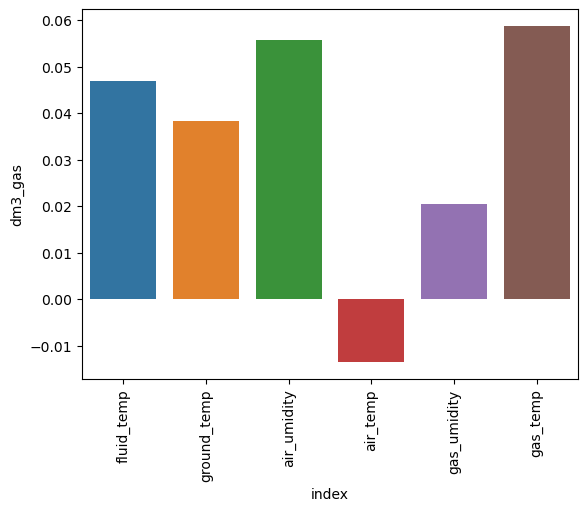

In [56]:
sns.barplot(x=cor['index'], y = cor['dm3_gas'])
plt.xticks(rotation=90)

<h1 style="font-size:3.5rem;color:blue;">Features Analysis</h1>

<h1 style="font-size:3.5rem;color:blue;">Models, Output of the models, Visuals of the predictions </h1>